[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Without filter extreme 43418
With filter extreme 43414
Topic: 0 
Words: 0.015*"protein" + 0.013*"cell" + 0.011*"mutation" + 0.009*"drug" + 0.008*"mutant" + 0.006*"inhibitor" + 0.005*"enzyme" + 0.005*"binding" + 0.004*"structure" + 0.004*"inhibition" + 0.003*"transcription" + 0.003*"site" + 0.003*"synthesis" + 0.003*"cell_wall" + 0.003*"DNA" + 0.003*"albicans" + 0.003*"interaction" + 0.003*"membrane" + 0.003*"domain" + 0.003*"MRSA" + 0.003*"aureus" + 0.003*"stress" + 0.003*"vancomycin" + 0.003*"Staphylococcus_aureus" + 0.003*"vitro" + 0.003*"transporter" + 0.003*"biosynthesis" + 0.002*"RNA" + 0.002*"substrate" + 0.002*"acid"


Topic: 1 
Words: 0.018*"plasmid" + 0.010*"bacteria" + 0.009*"sequence" + 0.008*"transfer" + 0.008*"DNA" + 0.007*"environment" + 0.006*"ARGs" + 0.005*"tetracycline" + 0.005*"genome" + 0.005*"virulence" + 0.005*"coli" + 0.004*"gene_transfer" + 0.004*"dissemination" + 0.004*"spread" + 0.004*"Escherichia_coli" + 0.004*"host" + 0.004*"conjugation" + 0.003*"pathogen" + 

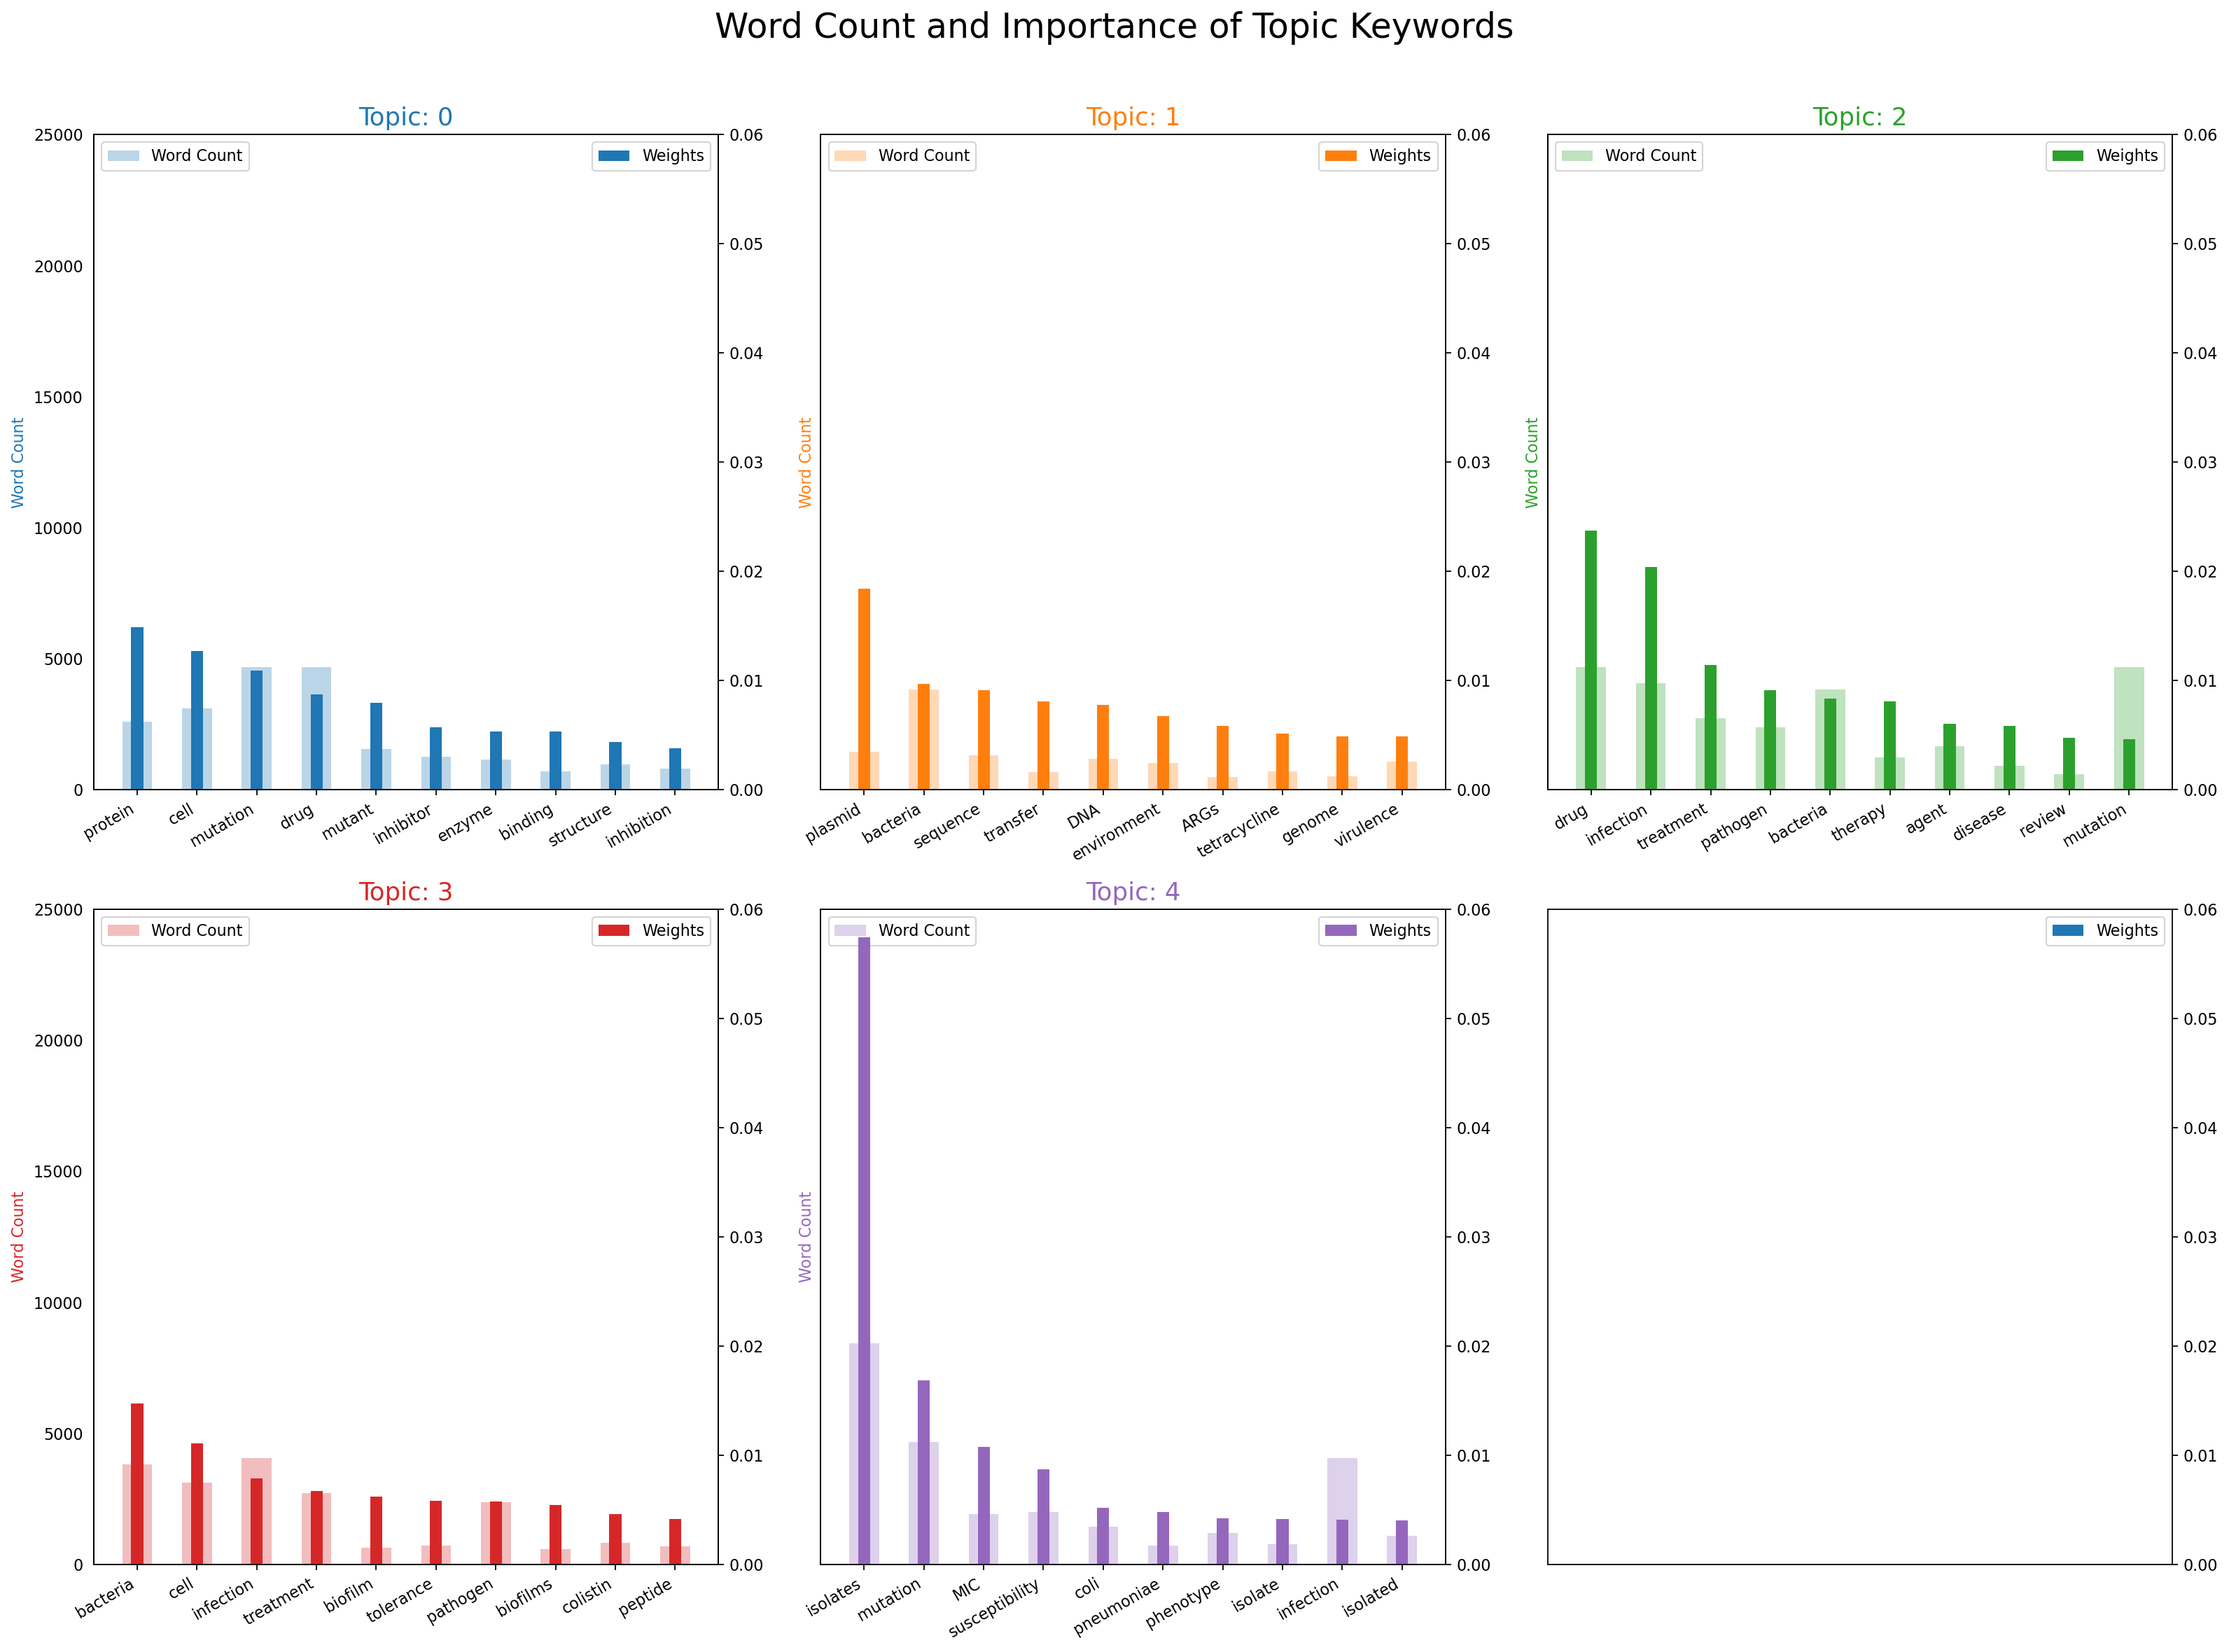

In [19]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from textblob import TextBlob
def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None
def get_adjectives(text):    
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if (tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS" or tag == "RB" or tag == "RBR" or tag == "RBS" or tag == "RP" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ" or tag == "FW" )]
import matplotlib.pyplot as plt

from socket import SocketIO
import pandas as pd
import numpy as np

review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets1 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets2=reviews_datasets1.iloc [0:8000]
reviews_datasets4 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets=reviews_datasets2[~reviews_datasets1.Articles.str.contains('None')]
reviews_datasets.head()
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer
from nltk.stem import porter
stop_words=set(nltk.corpus.stopwords.words('english'))
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context"]
new_stopwords.extend(['study',"bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])

#print(new_stopwords)
exclude = set(string.punctuation)

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def alphabet(ch):
    return ch.replace("α","alpha").replace("MICs","MIC").replace("β","beta").replace("γ","gamma").replace("δ","delta").replace("ε","epsilon").replace("ζ","zeta").replace("η","eta").replace("θ","theta").replace("ι","iota").replace("κ","kappa").replace("λ","lambda").replace("μ","mu").replace("ν","nu").replace("ξ","xi").replace("ο","omicron").replace("π","pi").replace("ρ","rho").replace("σ","sigma").replace("τ","tau").replace("υ","upsilon").replace("φ","phi").replace("χ","chi").replace("ψ","psi").replace("ω","omega")


def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=" ".join([le.lemmatize(i) for i in word_tokens if (( i.lower() not in stop_words) and ( not  i.isdigit()) and (len(i)>1) and ( le.lemmatize(i) not in stop_words) ) ])
    cleaned_text1=" ".join(alphabet(ch) for ch in tokens.split() if (ch not in exclude ))
    cleaned_text2=" ".join(ch for ch in cleaned_text1.split(".") )
    new_stopwords1=" ".join([le.lemmatize(i) for i in new_stopwords]) 
    stop_words1=" ".join([le.lemmatize(i) for i in stop_words])
    cleaned_text3=" ".join(ch for ch in cleaned_text2.split() if ( ( not  ch.isdigit()) and (len(ch)>1)))
    cleaned_text=" ".join(ch for ch in cleaned_text3.split() if ( ch not in new_stopwords1 ) and ( ch not in stop_words1 ) )
    return cleaned_text
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)
reviews_datasets['words'] = reviews_datasets['cleaned_text'].apply(get_adjectives)
doc_clean=[]
for doc in reviews_datasets['cleaned_text']:
    doc_clean.append(get_adjectives(doc))
   

bigram_mod = bigrams(doc_clean)
bigram = [bigram_mod[review] for review in doc_clean ]
#creating LDA model
id2word = corpora.Dictionary(bigram)
print("Without filter extreme",len(id2word))
id2word.filter_extremes(no_below=1, no_above=0.4)
print("With filter extreme",len(id2word))
corpus = [id2word.doc2bow(text) for text in bigram]

#creating LDA model
Lda = gensim.models.ldamodel.LdaModel
from gensim.test.utils import datapath
# Create the LDA model and fit it to the training data
ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=5, decay=0.5, offset=1, alpha="auto", eta="auto")
ldamodel.save('lda_train.model')
#printing topics
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


from sklearn.metrics import confusion_matrix
print("==================================================")
# Use the LDA model to make predictions on the test data
#predictions = ldamodel[corpusTest]
#ldamodel.update(corpusTest)
#print("predictions ", predictions)
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# Create the confusion matrix
#cm = confusion_matrix(y_test, predictions)
# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]


zero=0
first=0
second=0
third=0
fourth=0
# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))
for i in topics_per_document:
    #sort topics by their score
    main_topic=sorted(list(i),key=lambda x: x[1], reverse=True)
    #add the dominant one
    topic_out.append(main_topic[0][0])
    weight_out.append(main_topic[0][1])
    if(main_topic[0][0]==0 and main_topic[0][1]>=0.5):
        zero+=1
    if(main_topic[0][0]==1 and main_topic[0][1]>=0.5):
        first+=1
    if(main_topic[0][0]==2 and main_topic[0][1]>=0.5):
        second+=1
    if(main_topic[0][0]==3 and main_topic[0][1]>=0.5):
        third+=1 
    if(main_topic[0][0]==4 and main_topic[0][1]>=0.5):
       fourth+=1




reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic weight'] = weight_out
reviews_datasets['colFromIndex'] = reviews_datasets.index

#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('CompareTopics.0.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()


topic_zero = reviews_datasets[reviews_datasets['Topic'] == 0]
print('Number of documents with zero topic: ', len(topic_zero))
#topic_zero2=0
#for i in review_datasets:
#if ((review_datasets['Topic'] == 0) and (review_datasets['Topic weight'] >= 0.5)):
   # topic_zero2+=1 
topic_zero1=reviews_datasets['Topic weight'] .where(reviews_datasets['Topic'] == 0)
#topic_zero2=topic_zero1.where(review_datasets['Topic weight'] >= 0.5)
print('Number of documents with zero topic above 0.5: ', zero)
#print(topic_zero1)

topic_first = reviews_datasets[reviews_datasets['Topic'] == 1]
print('Number of documents with first topic: ', len(topic_first))
print('Number of documents with first topic above 0.5: ', first)

topic_second = reviews_datasets[reviews_datasets['Topic'] == 2]
print('Number of documents with second topic: ', len(topic_second))
print('Number of documents with second topic above 0.5: ', second)

topic_third = reviews_datasets[reviews_datasets['Topic'] == 3]
print('Number of documents with third topic: ', len(topic_third))
print('Number of documents with third topic above 0.5: ', third)

topic_fourth = reviews_datasets[reviews_datasets['Topic'] == 4]
print('Number of documents with fourth topic: ', len(topic_fourth))
print('Number of documents with fourth topic above 0.5: ', fourth)
# Compute Perplexity Score
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


print("Alpha score: ", ldamodel.alpha)
print("Eta score: ", ldamodel.eta)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

from collections import Counter
import matplotlib.colors as mcolors
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in bigram for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
writer = pd.ExcelWriter('WordsCount.xlsx')
df.to_excel(writer)
writer.save()

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(20,14), sharey=True, dpi=160)
axes[1][2].set_visible(False)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.06); ax.set_ylim(0, 25000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Coherence score according to the number of topics

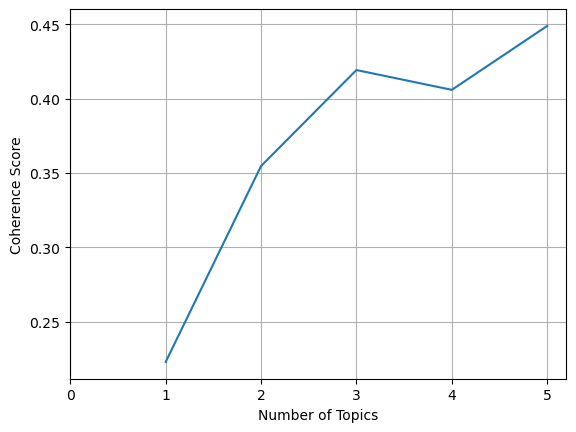

In [2]:
from gensim.models import CoherenceModel
coherence_scores=[]
for num_topics in range(1, 6):
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=num_topics, decay=0.5, offset=1, alpha="auto", eta="auto")
    coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores against the number of topics
plt.plot(range(1, 6), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(np.arange(0, 6, 1))
plt.grid()
plt.show()

In [3]:
print(coherence_scores)

[0.22302686378133302, 0.35470225650362774, 0.41924413892205487, 0.4059291420442514, 0.4489003669205416]


LDA 4 topics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Without filter extreme 43418
With filter extreme 43414
Topic: 0 
Words: 0.013*"protein" + 0.012*"cell" + 0.010*"mutation" + 0.007*"mutant" + 0.007*"drug" + 0.006*"inhibitor" + 0.005*"enzyme" + 0.005*"binding" + 0.004*"structure" + 0.004*"DNA" + 0.003*"membrane" + 0.003*"inhibition" + 0.003*"virus" + 0.003*"site" + 0.003*"acid" + 0.003*"transcription" + 0.003*"bacteria" + 0.003*"synthesis" + 0.003*"MRSA" + 0.003*"stress" + 0.003*"cell_wall" + 0.003*"interaction" + 0.002*"domain" + 0.002*"peptide" + 0.002*"aureus" + 0.002*"substrate" + 0.002*"vancomycin" + 0.002*"Staphylococcus_aureus" + 0.002*"transporter" + 0.002*"sensitivity"


Topic: 1 
Words: 0.020*"isolates" + 0.014*"plasmid" + 0.008*"coli" + 0.008*"sequence" + 0.006*"tetracycline" + 0.005*"transfer" + 0.005*"bacteria" + 0.005*"isolated" + 0.004*"DNA" + 0.004*"ARGs" + 0.004*"Escherichia_coli" + 0.004*"spread" + 0.004*"environment" + 0.003*"dissemination" + 0.003*"genome" + 0.003*"virulence" + 0.003*"phenotype" + 0.003*"erythromycin

c:\Users\tretiak\Anaconda3\Anaconda3.0\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


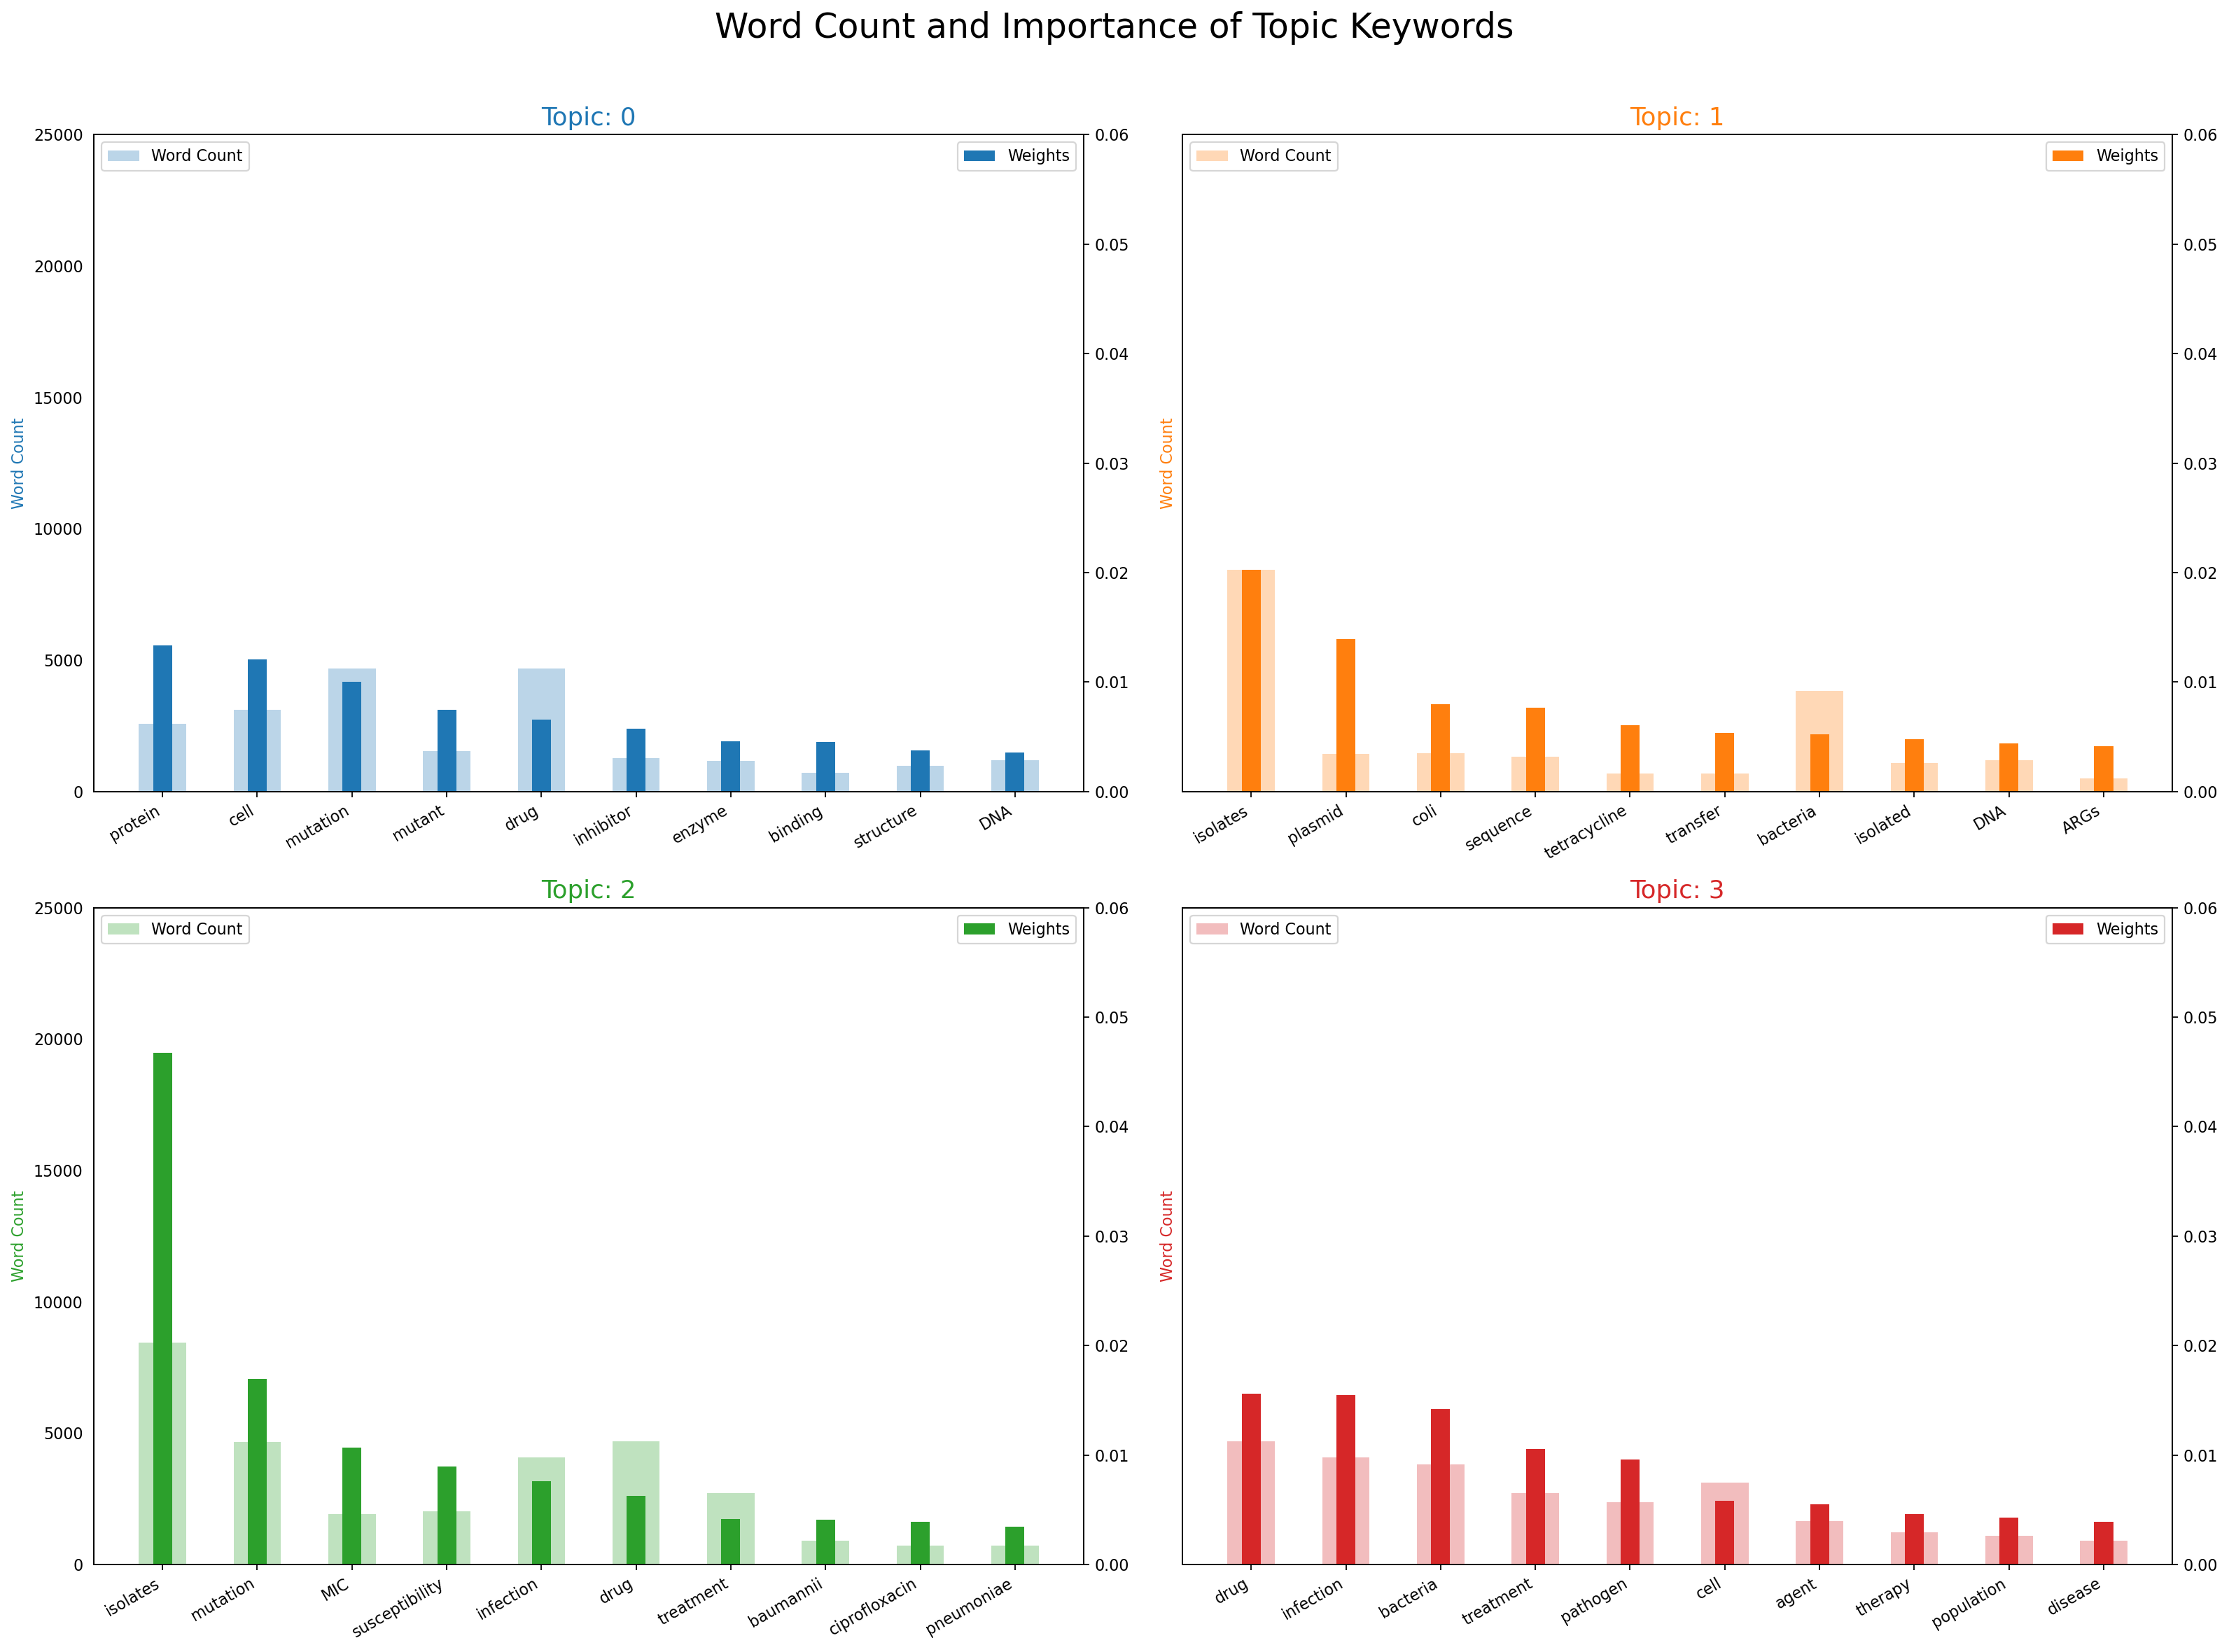

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from textblob import TextBlob
def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None
def get_adjectives(text):    
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if (tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS" or tag == "RB" or tag == "RBR" or tag == "RBS" or tag == "RP" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ" or tag == "FW" )]
import matplotlib.pyplot as plt

from socket import SocketIO
import pandas as pd
import numpy as np

review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets1 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets2=reviews_datasets1.iloc [0:8000]
reviews_datasets4 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets=reviews_datasets2[~reviews_datasets1.Articles.str.contains('None')]
reviews_datasets.head()
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer
from nltk.stem import porter
stop_words=set(nltk.corpus.stopwords.words('english'))
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context"]
new_stopwords.extend(['study',"bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])

#print(new_stopwords)
exclude = set(string.punctuation)

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def alphabet(ch):
    return ch.replace("α","alpha").replace("MICs","MIC").replace("β","beta").replace("γ","gamma").replace("δ","delta").replace("ε","epsilon").replace("ζ","zeta").replace("η","eta").replace("θ","theta").replace("ι","iota").replace("κ","kappa").replace("λ","lambda").replace("μ","mu").replace("ν","nu").replace("ξ","xi").replace("ο","omicron").replace("π","pi").replace("ρ","rho").replace("σ","sigma").replace("τ","tau").replace("υ","upsilon").replace("φ","phi").replace("χ","chi").replace("ψ","psi").replace("ω","omega")


def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=" ".join([le.lemmatize(i) for i in word_tokens if (( i.lower() not in stop_words) and ( not  i.isdigit()) and (len(i)>1) and ( le.lemmatize(i) not in stop_words) ) ])
    cleaned_text1=" ".join(alphabet(ch) for ch in tokens.split() if (ch not in exclude ))
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in tokens.split())
    cleaned_text2=" ".join(ch for ch in cleaned_text1.split(".") )
    #cleaned_text2=[ch for ch in cleaned_text1.split(".")] 
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in cleaned_text2 )
    new_stopwords1=" ".join([le.lemmatize(i) for i in new_stopwords]) 
    stop_words1=" ".join([le.lemmatize(i) for i in stop_words])
    cleaned_text3=" ".join(ch for ch in cleaned_text2.split() if ( ( not  ch.isdigit()) and (len(ch)>1)))
    cleaned_text=" ".join(ch for ch in cleaned_text3.split() if ( ch not in new_stopwords1 ) and ( ch not in stop_words1 ) )
    return cleaned_text
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)
reviews_datasets['words'] = reviews_datasets['cleaned_text'].apply(get_adjectives)
#doc_clean1 = " ".join([clean_text(doc).split() for doc in reviews_datasets['Articles']] )
#doc_clean = [clean_text(doc).split() for doc in doc_clean1]   
#doc_clean1 = [clean_text(doc).split() for doc in reviews_datasets['Articles']] 
#doc_clean = [doc for doc in reviews_datasets['Articles']]  
doc_clean=[]
for doc in reviews_datasets['cleaned_text']:
    doc_clean.append(get_adjectives(doc))
    #doc_clean.append(doc_clean1)
   

bigram_mod = bigrams(doc_clean)
bigram = [bigram_mod[review] for review in doc_clean ]
#bigram=[get_adjectives(words) for words in bigram1]
#creating LDA model
id2word = corpora.Dictionary(bigram)
print("Without filter extreme",len(id2word))
id2word.filter_extremes(no_below=1, no_above=0.4)
print("With filter extreme",len(id2word))
corpus = [id2word.doc2bow(text) for text in bigram]

#creating LDA model
Lda = gensim.models.ldamodel.LdaModel
from gensim.test.utils import datapath
# Create the LDA model and fit it to the training data
ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=4, decay=0.5, offset=1, alpha="auto", eta="auto")
ldamodel.save('lda_train.model')
#printing topics
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


from sklearn.metrics import confusion_matrix
print("==================================================")
# Use the LDA model to make predictions on the test data
#predictions = ldamodel[corpusTest]
#ldamodel.update(corpusTest)
#print("predictions ", predictions)
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# Create the confusion matrix
#cm = confusion_matrix(y_test, predictions)
# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]


zero=0
first=0
second=0
third=0
fourth=0
# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))
for i in topics_per_document:
    #sort topics by their score
    main_topic=sorted(list(i),key=lambda x: x[1], reverse=True)
    #add the dominant one
    topic_out.append(main_topic[0][0])
    weight_out.append(main_topic[0][1])
    if(main_topic[0][0]==0 and main_topic[0][1]>=0.5):
        zero+=1
    if(main_topic[0][0]==1 and main_topic[0][1]>=0.5):
        first+=1
    if(main_topic[0][0]==2 and main_topic[0][1]>=0.5):
        second+=1
    if(main_topic[0][0]==3 and main_topic[0][1]>=0.5):
        third+=1 
    if(main_topic[0][0]==4 and main_topic[0][1]>=0.5):
       fourth+=1




reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic weight'] = weight_out
reviews_datasets['colFromIndex'] = reviews_datasets.index

#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('CompareTopics.0.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()


topic_zero = reviews_datasets[reviews_datasets['Topic'] == 0]
print('Number of documents with zero topic: ', len(topic_zero))
#topic_zero2=0
#for i in review_datasets:
#if ((review_datasets['Topic'] == 0) and (review_datasets['Topic weight'] >= 0.5)):
   # topic_zero2+=1 
topic_zero1=reviews_datasets['Topic weight'] .where(reviews_datasets['Topic'] == 0)
#topic_zero2=topic_zero1.where(review_datasets['Topic weight'] >= 0.5)
print('Number of documents with zero topic above 0.5: ', zero)
#print(topic_zero1)

topic_first = reviews_datasets[reviews_datasets['Topic'] == 1]
print('Number of documents with first topic: ', len(topic_first))
print('Number of documents with first topic above 0.5: ', first)

topic_second = reviews_datasets[reviews_datasets['Topic'] == 2]
print('Number of documents with second topic: ', len(topic_second))
print('Number of documents with second topic above 0.5: ', second)

topic_third = reviews_datasets[reviews_datasets['Topic'] == 3]
print('Number of documents with third topic: ', len(topic_third))
print('Number of documents with third topic above 0.5: ', third)

topic_fourth = reviews_datasets[reviews_datasets['Topic'] == 4]
print('Number of documents with fourth topic: ', len(topic_fourth))
print('Number of documents with fourth topic above 0.5: ', fourth)
# Compute Perplexity Score
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


print("Alpha score: ", ldamodel.alpha)
print("Eta score: ", ldamodel.eta)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

from collections import Counter
import matplotlib.colors as mcolors
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in bigram for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
writer = pd.ExcelWriter('WordsCount.xlsx')
df.to_excel(writer)
writer.save()

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(20,14), sharey=True, dpi=160)
#axes[1][2].set_visible(False)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.06); ax.set_ylim(0, 25000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Wordclouds

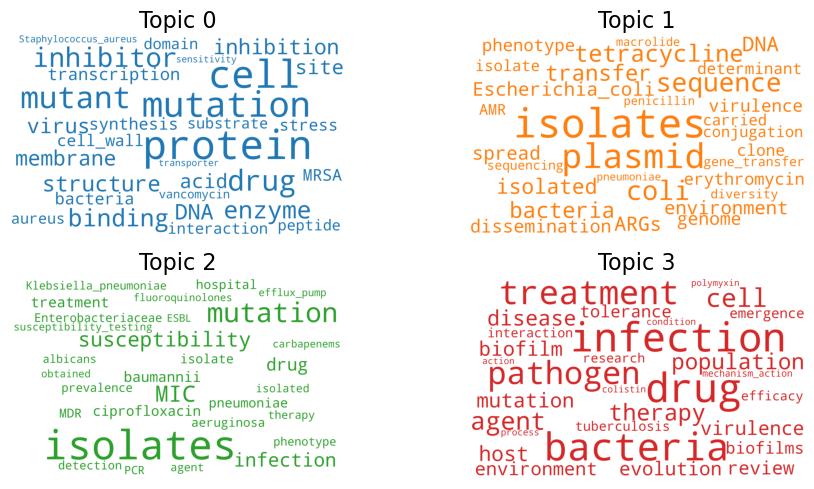

In [9]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1500,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1)

topics = ldamodel.show_topics(formatted=False, num_words=30)

fig, axes = plt.subplots(2, 2, figsize=(10,5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    except:
        break


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [12]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(coherence_score)

0.4059291420442514


pyLDAvis

In [13]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.106014 -0.103892       1        1  32.385722
0     -0.169667  0.080983       2        1  27.192629
2      0.139650 -0.107842       3        1  23.301975
1      0.136031  0.130751       4        1  17.119674, topic_info=            Term         Freq        Total Category  logprob  loglift
338     isolates  7850.000000  7850.000000  Default  30.0000  30.0000
268      plasmid  1297.000000  1297.000000  Default  29.0000  29.0000
245         cell  2836.000000  2836.000000  Default  28.0000  28.0000
175      protein  2406.000000  2406.000000  Default  27.0000  27.0000
457     mutation  4389.000000  4389.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
927    phenotype   287.876657  1105.526406   Topic4  -5.7799   0.4194
1022     isolate   251.663266   723.305709   Topic4  -5.9143   0.7092
387          AMR   236.950512   584.658884   Topic4  -5.9746   0.8618
555   sequencing   229.860856   578.996319   Topic4  -6.0049   0.8411
61    pneumoniae   212.687178   699.885245   Topic4  -6.0826   0.5738

[324 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
3186      3  0.013827              AAC
3186      4  0.981734              AAC
1773      1  0.005462  ABC_transporter
1773      2  0.923007  ABC_transporter
1773      3  0.071001  ABC_transporter
...     ...       ...              ...
74        2  0.143471        virulence
74        3  0.051502        virulence
74        4  0.274986        virulence
693       1  0.222204            virus
693       2  0.777713            virus

[633 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

Document-topic matrix

In [22]:
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]
# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))#
zero=[]
first=[]
second=[]
third=[]
fourth=[]
for i in topics_per_document:
    #sort topics by their score
    z=0
    f=0
    s=0
    th=0
    fo=0
    main_topic=list(i)
    for t in main_topic:
        if (t[0]==0): 
            zero.append(t[1])
            z+=1
        if (t[0]==1): 
            first.append(t[1])
            f+=1
        if (t[0]==2): 
            second.append(t[1])
            s+=1
        if (t[0]==3): 
            third.append(t[1])
            th+=1
        if (t[0]==4): 
            fourth.append(t[1])
            fo+=1
    if (z==0): zero.append(" ")
    if (f==0): first.append(" ")
    if (s==0): second.append(" ")
    if (th==0): third.append(" ")
    if (fo==0): fourth.append(" ")
    #add the dominant one
    topic_out.append(list(main_topic))
    weight_out.append(main_topic[0][1])
   
#print(zero)
reviews_datasets.head()
reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic 0'] = zero
reviews_datasets['Topic 1'] = first
reviews_datasets['Topic 2'] = second
reviews_datasets['Topic 3'] = third
reviews_datasets['Topic 4'] = fourth
reviews_datasets['colFromIndex'] = reviews_datasets.index
reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Document_Topic_Matrix_4topics.xlsx')
reviews_datasets.head()

reviews_datasets.to_excel(writer)
writer.save()

# Compute Perplexity Score
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


print("Alpha score: ", ldamodel.alpha)
print("Eta score: ", ldamodel.eta)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

Topic: 0 
Words: 0.013*"protein" + 0.012*"cell" + 0.010*"mutation" + 0.007*"mutant" + 0.007*"drug" + 0.006*"inhibitor" + 0.005*"enzyme" + 0.005*"binding" + 0.004*"structure" + 0.004*"DNA" + 0.003*"membrane" + 0.003*"inhibition" + 0.003*"virus" + 0.003*"site" + 0.003*"acid" + 0.003*"transcription" + 0.003*"bacteria" + 0.003*"synthesis" + 0.003*"MRSA" + 0.003*"stress" + 0.003*"cell_wall" + 0.003*"interaction" + 0.002*"domain" + 0.002*"peptide" + 0.002*"aureus" + 0.002*"substrate" + 0.002*"vancomycin" + 0.002*"Staphylococcus_aureus" + 0.002*"transporter" + 0.002*"sensitivity"


Topic: 1 
Words: 0.020*"isolates" + 0.014*"plasmid" + 0.008*"coli" + 0.008*"sequence" + 0.006*"tetracycline" + 0.005*"transfer" + 0.005*"bacteria" + 0.005*"isolated" + 0.004*"DNA" + 0.004*"ARGs" + 0.004*"Escherichia_coli" + 0.004*"spread" + 0.004*"environment" + 0.003*"dissemination" + 0.003*"genome" + 0.003*"virulence" + 0.003*"phenotype" + 0.003*"erythromycin" + 0.003*"clone" + 0.003*"determinant" + 0.003*"isolat

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.106014 -0.103892       1        1  32.386861
0     -0.169667  0.080983       2        1  27.191438
2      0.139650 -0.107842       3        1  23.304195
1      0.136031  0.130751       4        1  17.117505, topic_info=            Term         Freq        Total Category  logprob  loglift
338     isolates  7851.000000  7851.000000  Default  30.0000  30.0000
268      plasmid  1297.000000  1297.000000  Default  29.0000  29.0000
245         cell  2836.000000  2836.000000  Default  28.0000  28.0000
175      protein  2406.000000  2406.000000  Default  27.0000  27.0000
457     mutation  4389.000000  4389.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
927    phenotype   287.840194  1105.515419   Topic4  -5.7799   0.4194
1022     isolate   251.631390   723.310190   Topic4  -5.9143   0.7092
387          AMR   236.920500   584.642956   Topic4  -5.9746   0.8618
555   sequencing   229.831741   578.991663   Topic4  -6.0049   0.8411
61    pneumoniae   212.660238   699.901626   Topic4  -6.0826   0.5738

[324 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
3186      3  0.013829              AAC
3186      4  0.981855              AAC
1773      1  0.005462  ABC_transporter
1773      2  0.923038  ABC_transporter
1773      3  0.071003  ABC_transporter
...     ...       ...              ...
74        2  0.143474        virulence
74        3  0.051503        virulence
74        4  0.274991        virulence
693       1  0.222210            virus
693       2  0.777733            virus

[633 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

Cosine similarity for 4 topics

In [28]:
from gensim import models
from gensim.corpora import Dictionary
from sklearn.metrics.pairwise import cosine_similarity
all_similarities=[]
for i in range(4):
    # Obtain the topic distribution for the deleted topic
    deleted_topic = ldamodel.show_topics(num_topics=4, num_words=10)[i]
    topics= ldamodel.show_topics(num_topics=5, num_words=10)
    del topics[i]
    remaining_topic=topics
#print(remaining_topic)
    deleted_topic_distribution1 = ldamodel.get_topic_terms(i, topn=len(id2word))
    #print("Topic distribution ",deleted_topic_distribution1)



# Obtain the topic distributions for the remaining topics
    remaining_topic_distributions1 = [ldamodel.get_topic_terms(k, topn=len(id2word)) for k in range(4) ]
    deleted_topic_distribution = [item for sublist in deleted_topic_distribution1 for item in sublist]
    remaining_topic_distributions=[]
    for j in remaining_topic_distributions1:
        remaining_topic_distributions2 = [item for sublist in j for item in sublist]
        remaining_topic_distributions.append(remaining_topic_distributions2)
#print(remaining_topic_distributions)

# Calculate the similarity between the deleted topic and the remaining topics
    similarities = []
    for remaining_topic_distribution in remaining_topic_distributions:
        similarity = cosine_similarity([deleted_topic_distribution], [remaining_topic_distribution])[0][0]
        similarities.append(similarity) 
    all_similarities.append(similarities)
print(all_similarities)

data = {
  "topic 0": all_similarities[0],
  "topic 1": all_similarities[1],
  "topic 2": all_similarities[2],
  "topic 3": all_similarities[3],
}
df = pd.DataFrame(data, columns=["topic 0" ,"topic 1","topic 2","topic 3"])
#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Cosine_similarity_4topics.xlsx')
df.to_excel(writer)
writer.save()

[[1.0, 0.7782519551435695, 0.7729344749719911, 0.7844916302923837], [0.7782519551435695, 1.0000000000000002, 0.7915273797925066, 0.7912893347538607], [0.7729344749719911, 0.7915273797925066, 0.9999999999999996, 0.7889541251851865], [0.7844916302923837, 0.7912893347538607, 0.7889541251851865, 1.0000000000000002]]


Coherence score according to the number of iterations

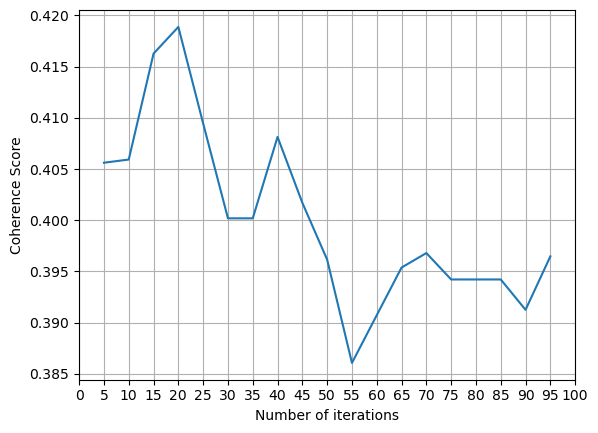

In [5]:
from gensim.models import CoherenceModel
coherence_scores=[]
for iterations in range(5, 100,5):
    Lda = gensim.models.ldamodel.LdaModel
# Create the LDA model and fit it to the training data
    ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=iterations, random_state=42, num_topics=4, decay=0.5, offset=1, alpha="auto", eta="auto")
    # Create an LDA model with the current number of topics
    
    # Compute the coherence score for the current model
    coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores against the number of topics
plt.plot(range(5, 100,5), coherence_scores)
plt.xlabel('Number of iterations')
plt.ylabel('Coherence Score')
plt.xticks(np.arange(0, 101, 5))
plt.grid()
plt.show()

0.1
43395
0.2
43407
0.3
43412
0.4
43414
0.5
43416
0.6
43416
0.7
43416
0.8
43416
[0.4015180943107314, 0.43051281324803164, 0.39236723358574765, 0.4489003669205416, 0.4148228795011494, 0.4148228795011494, 0.4148228795011494, 0.4148228795011494]


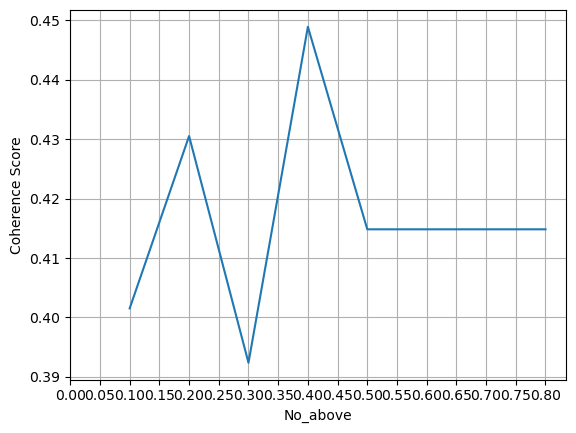

In [7]:
coherence_scores=[]
for no_above in range(10, 90,10):
    i= float(no_above)/100
    print(i)
    id2word = corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=1, no_above=i)
    print(len(id2word))
    corpus = [id2word.doc2bow(text) for text in bigram]
    Lda = gensim.models.ldamodel.LdaModel
    # Create the LDA model and fit it to the training data
    ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=5, decay=0.5, offset=1, alpha="auto", eta="auto")
    # Create an LDA model with the current number of topics
    
    # Compute the coherence score for the current model
    coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)
    
    
print(coherence_scores)
x=[float(no_above)/100 for no_above in range(10, 90,10)]
plt.plot(x, coherence_scores)
plt.xlabel('No_above')
plt.ylabel('Coherence Score')
plt.xticks(np.arange(0, 0.81,0.05))
plt.grid()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Without filter extreme 43418
With filter extreme 43414
Topic: 0 
Words: 0.013*"protein" + 0.012*"cell" + 0.010*"mutation" + 0.007*"mutant" + 0.007*"drug" + 0.006*"inhibitor" + 0.004*"enzyme" + 0.004*"binding" + 0.004*"structure" + 0.004*"DNA" + 0.003*"membrane" + 0.003*"inhibition" + 0.003*"virus" + 0.003*"site" + 0.003*"bacteria" + 0.003*"acid" + 0.003*"transcription" + 0.003*"interaction" + 0.003*"synthesis" + 0.003*"MRSA" + 0.003*"stress" + 0.003*"cell_wall" + 0.002*"peptide" + 0.002*"Staphylococcus_aureus" + 0.002*"domain" + 0.002*"aureus" + 0.002*"vancomycin" + 0.002*"substrate" + 0.002*"assay" + 0.002*"sensitivity"


Topic: 1 
Words: 0.022*"isolates" + 0.014*"plasmid" + 0.008*"coli" + 0.007*"sequence" + 0.006*"tetracycline" + 0.005*"bacteria" + 0.005*"transfer" + 0.005*"isolated" + 0.004*"DNA" + 0.004*"ARGs" + 0.004*"environment" + 0.004*"Escherichia_coli" + 0.004*"spread" + 0.003*"dissemination" + 0.003*"virulence" + 0.003*"phenotype" + 0.003*"genome" + 0.003*"erythromycin" + 0.

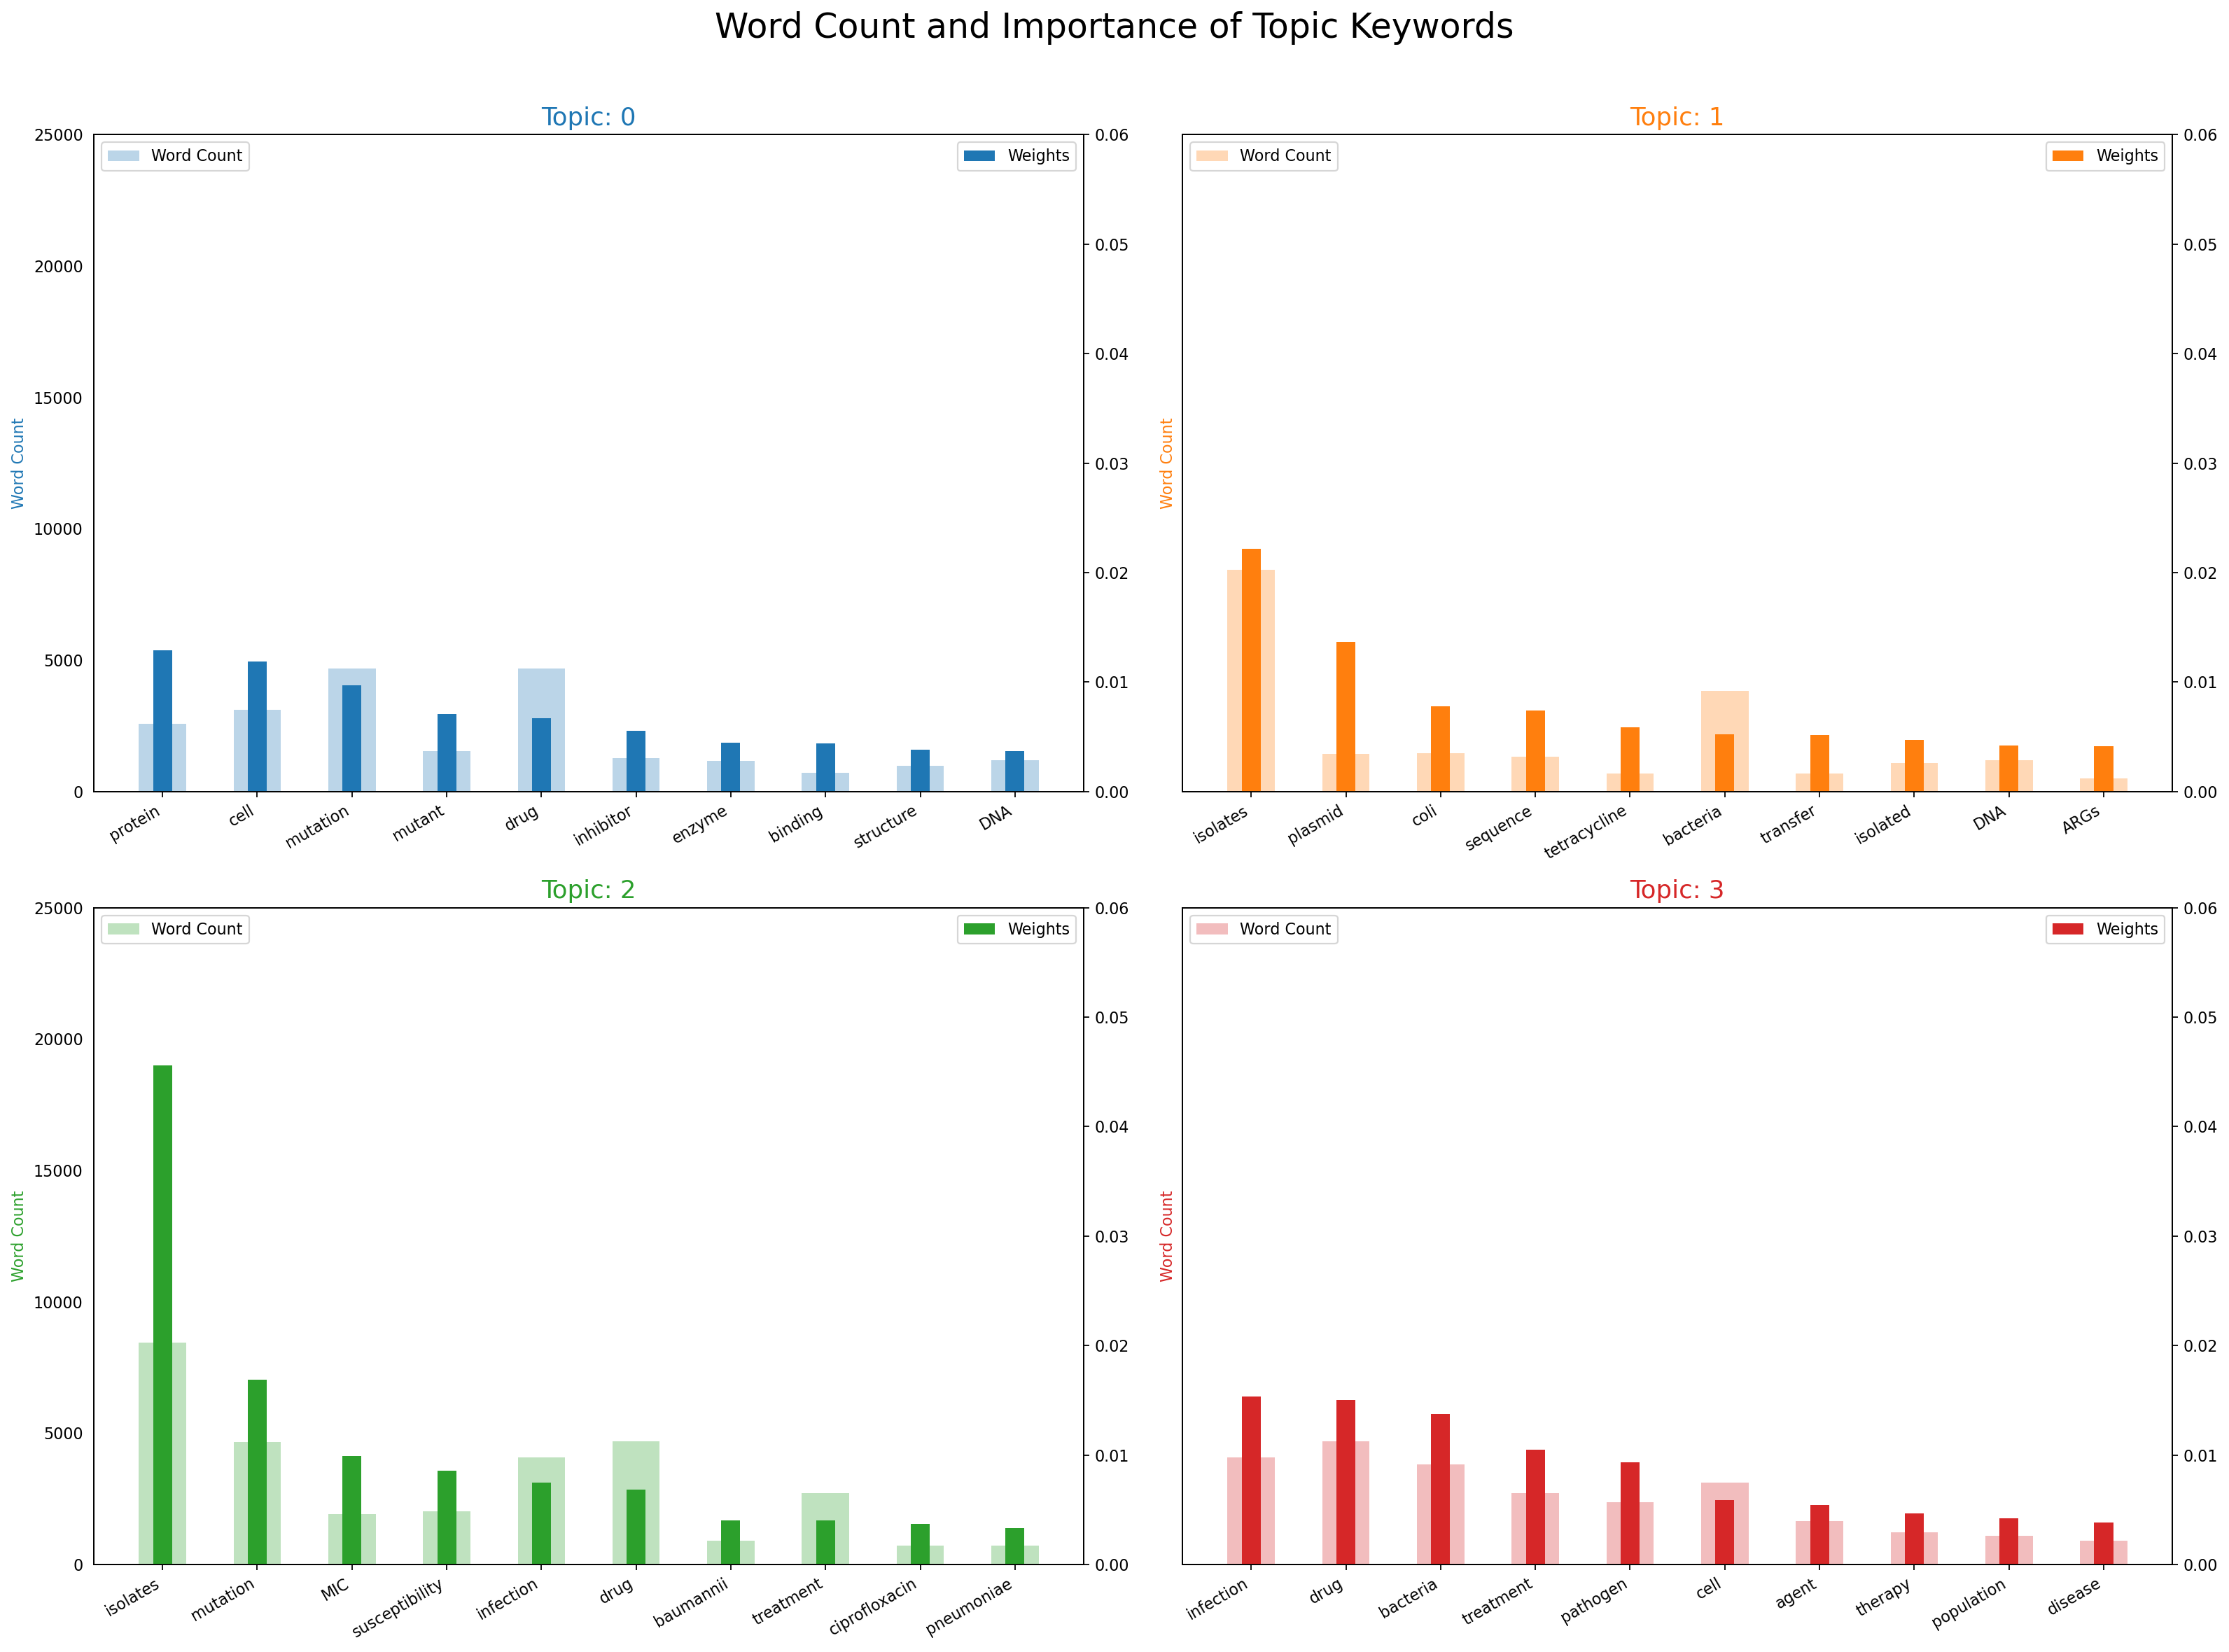

In [8]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from textblob import TextBlob
def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None
def get_adjectives(text):    
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if (tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS" or tag == "RB" or tag == "RBR" or tag == "RBS" or tag == "RP" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ" or tag == "FW" )]
import matplotlib.pyplot as plt

from socket import SocketIO
import pandas as pd
import numpy as np

review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets1 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets2=reviews_datasets1.iloc [0:8000]
reviews_datasets4 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets=reviews_datasets2[~reviews_datasets1.Articles.str.contains('None')]
reviews_datasets.head()
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer
from nltk.stem import porter
stop_words=set(nltk.corpus.stopwords.words('english'))
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context"]
new_stopwords.extend(['study',"bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])

#print(new_stopwords)
exclude = set(string.punctuation)

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def alphabet(ch):
    return ch.replace("α","alpha").replace("MICs","MIC").replace("β","beta").replace("γ","gamma").replace("δ","delta").replace("ε","epsilon").replace("ζ","zeta").replace("η","eta").replace("θ","theta").replace("ι","iota").replace("κ","kappa").replace("λ","lambda").replace("μ","mu").replace("ν","nu").replace("ξ","xi").replace("ο","omicron").replace("π","pi").replace("ρ","rho").replace("σ","sigma").replace("τ","tau").replace("υ","upsilon").replace("φ","phi").replace("χ","chi").replace("ψ","psi").replace("ω","omega")


def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=" ".join([le.lemmatize(i) for i in word_tokens if (( i.lower() not in stop_words) and ( not  i.isdigit()) and (len(i)>1) and ( le.lemmatize(i) not in stop_words) ) ])
    cleaned_text1=" ".join(alphabet(ch) for ch in tokens.split() if (ch not in exclude ))
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in tokens.split())
    cleaned_text2=" ".join(ch for ch in cleaned_text1.split(".") )
    #cleaned_text2=[ch for ch in cleaned_text1.split(".")] 
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in cleaned_text2 )
    new_stopwords1=" ".join([le.lemmatize(i) for i in new_stopwords]) 
    stop_words1=" ".join([le.lemmatize(i) for i in stop_words])
    cleaned_text3=" ".join(ch for ch in cleaned_text2.split() if ( ( not  ch.isdigit()) and (len(ch)>1)))
    cleaned_text=" ".join(ch for ch in cleaned_text3.split() if ( ch not in new_stopwords1 ) and ( ch not in stop_words1 ) )
    return cleaned_text
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)
reviews_datasets['words'] = reviews_datasets['cleaned_text'].apply(get_adjectives)
#doc_clean1 = " ".join([clean_text(doc).split() for doc in reviews_datasets['Articles']] )
#doc_clean = [clean_text(doc).split() for doc in doc_clean1]   
#doc_clean1 = [clean_text(doc).split() for doc in reviews_datasets['Articles']] 
#doc_clean = [doc for doc in reviews_datasets['Articles']]  
doc_clean=[]
for doc in reviews_datasets['cleaned_text']:
    doc_clean.append(get_adjectives(doc))
    #doc_clean.append(doc_clean1)
   

bigram_mod = bigrams(doc_clean)
bigram = [bigram_mod[review] for review in doc_clean ]
#bigram=[get_adjectives(words) for words in bigram1]
#creating LDA model
id2word = corpora.Dictionary(bigram)
print("Without filter extreme",len(id2word))
id2word.filter_extremes(no_below=1, no_above=0.4)
print("With filter extreme",len(id2word))
corpus = [id2word.doc2bow(text) for text in bigram]

#creating LDA model
Lda = gensim.models.ldamodel.LdaModel
from gensim.test.utils import datapath
# Create the LDA model and fit it to the training data
ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=20, random_state=42, num_topics=4, decay=0.5, offset=1, alpha="auto", eta="auto")
ldamodel.save('lda_train.model')
#printing topics
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


from sklearn.metrics import confusion_matrix
print("==================================================")
# Use the LDA model to make predictions on the test data
#predictions = ldamodel[corpusTest]
#ldamodel.update(corpusTest)
#print("predictions ", predictions)
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# Create the confusion matrix
#cm = confusion_matrix(y_test, predictions)
# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]


zero=0
first=0
second=0
third=0
fourth=0
# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))
for i in topics_per_document:
    #sort topics by their score
    main_topic=sorted(list(i),key=lambda x: x[1], reverse=True)
    #add the dominant one
    topic_out.append(main_topic[0][0])
    weight_out.append(main_topic[0][1])
    if(main_topic[0][0]==0 and main_topic[0][1]>=0.5):
        zero+=1
    if(main_topic[0][0]==1 and main_topic[0][1]>=0.5):
        first+=1
    if(main_topic[0][0]==2 and main_topic[0][1]>=0.5):
        second+=1
    if(main_topic[0][0]==3 and main_topic[0][1]>=0.5):
        third+=1 
    if(main_topic[0][0]==4 and main_topic[0][1]>=0.5):
       fourth+=1




reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic weight'] = weight_out
reviews_datasets['colFromIndex'] = reviews_datasets.index

#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('CompareTopics.0.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()


topic_zero = reviews_datasets[reviews_datasets['Topic'] == 0]
print('Number of documents with zero topic: ', len(topic_zero))
#topic_zero2=0
#for i in review_datasets:
#if ((review_datasets['Topic'] == 0) and (review_datasets['Topic weight'] >= 0.5)):
   # topic_zero2+=1 
topic_zero1=reviews_datasets['Topic weight'] .where(reviews_datasets['Topic'] == 0)
#topic_zero2=topic_zero1.where(review_datasets['Topic weight'] >= 0.5)
print('Number of documents with zero topic above 0.5: ', zero)
#print(topic_zero1)

topic_first = reviews_datasets[reviews_datasets['Topic'] == 1]
print('Number of documents with first topic: ', len(topic_first))
print('Number of documents with first topic above 0.5: ', first)

topic_second = reviews_datasets[reviews_datasets['Topic'] == 2]
print('Number of documents with second topic: ', len(topic_second))
print('Number of documents with second topic above 0.5: ', second)

topic_third = reviews_datasets[reviews_datasets['Topic'] == 3]
print('Number of documents with third topic: ', len(topic_third))
print('Number of documents with third topic above 0.5: ', third)

topic_fourth = reviews_datasets[reviews_datasets['Topic'] == 4]
print('Number of documents with fourth topic: ', len(topic_fourth))
print('Number of documents with fourth topic above 0.5: ', fourth)
# Compute Perplexity Score
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


print("Alpha score: ", ldamodel.alpha)
print("Eta score: ", ldamodel.eta)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

from collections import Counter
import matplotlib.colors as mcolors
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in bigram for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
writer = pd.ExcelWriter('WordsCount.xlsx')
df.to_excel(writer)
writer.save()

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(20,14), sharey=True, dpi=160)
#axes[1][2].set_visible(False)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.06); ax.set_ylim(0, 25000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()